<a href="https://colab.research.google.com/gist/sumitra288/a53a7e7c932553bcb32166d3070dd324/assignment-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [13]:
train = pd.read_csv("california_housing_train.csv")
test = pd.read_csv("california_housing_test.csv")

X_train, y_train = train.iloc[:, :-1].values, train.iloc[:, -1].values
X_test, y_test = test.iloc[:, :-1].values, test.iloc[:, -1].values

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

In [ ]:
def normal_equation(X, y):
    return np.linalg.inv(X.T @ X) @ (X.T @ y)

theta_ne = normal_equation(X_train, y_train)
y_pred_ne = X_test @ theta_ne

In [ ]:
def mse_loss(X, y, theta):
    return np.mean((X @ theta - y) ** 2) / 2

def gradient_descent(X, y, lr=0.01, iterations=1000, tol=1e-6):
    n, d = X.shape
    theta = np.zeros(d)
    losses = []
    for i in range(iterations):
        preds = X @ theta
        grad = (1/n) * X.T @ (preds - y)
        theta -= lr * grad
        loss = mse_loss(X, y, theta)
        losses.append(loss)
        if i > 0 and abs(losses[-2] - losses[-1]) < tol:
            break
    return theta, losses

theta_gd, losses = gradient_descent(X_train, y_train, lr=0.01, iterations=1000)
y_pred_gd = X_test @ theta_gd

In [ ]:
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
y_pred_sklearn = model.predict(X_test)

In [ ]:
def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return {"MSE": mse, "RMSE": rmse, "R2": r2, "MAE": mae}

print("Normal Equation:", evaluate(y_test, y_pred_ne))
print("Gradient Descent:", evaluate(y_test, y_pred_gd))
print("Scikit-learn:", evaluate(y_test, y_pred_sklearn))

Normal Equation: {'MSE': 4867205486.9288645, 'RMSE': np.float64(69765.36022216802), 'R2': 0.6195057678312001, 'MAE': 50352.22825794289}
Gradient Descent: {'MSE': 5149828415.410274, 'RMSE': np.float64(71762.30497559477), 'R2': 0.5974116946603373, 'MAE': 51945.74128874486}
Scikit-learn: {'MSE': 4867205486.928866, 'RMSE': np.float64(69765.36022216803), 'R2': 0.6195057678311999, 'MAE': 50352.22825794297}


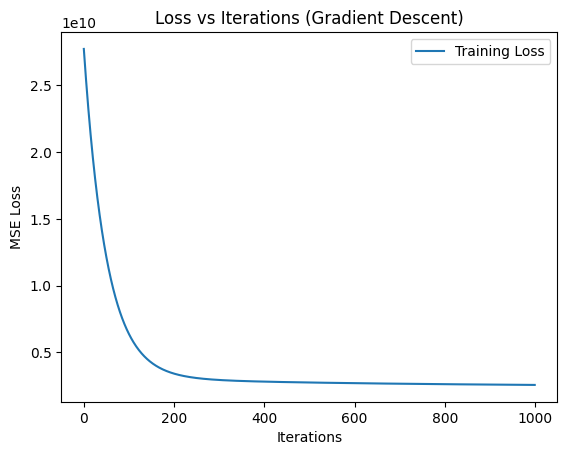

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(len(losses)), losses, label="Training Loss")
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.title("Loss vs Iterations (Gradient Descent)")
plt.legend()
plt.show()

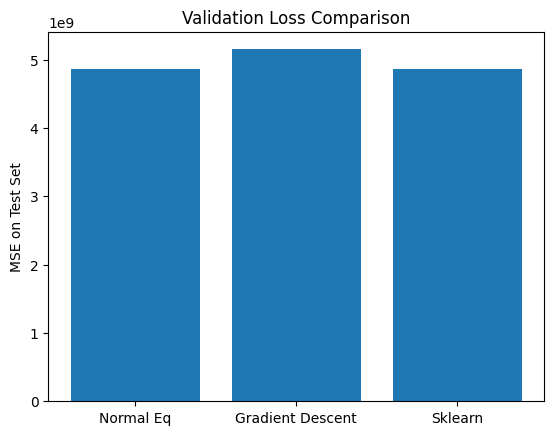

In [ ]:
from sklearn.metrics import mean_squared_error

mse_ne = mean_squared_error(y_test, y_pred_ne)
mse_gd = mean_squared_error(y_test, y_pred_gd)
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)

plt.bar(["Normal Eq", "Gradient Descent", "Sklearn"],
        [mse_ne, mse_gd, mse_sklearn])
plt.ylabel("MSE on Test Set")
plt.title("Validation Loss Comparison")
plt.show()

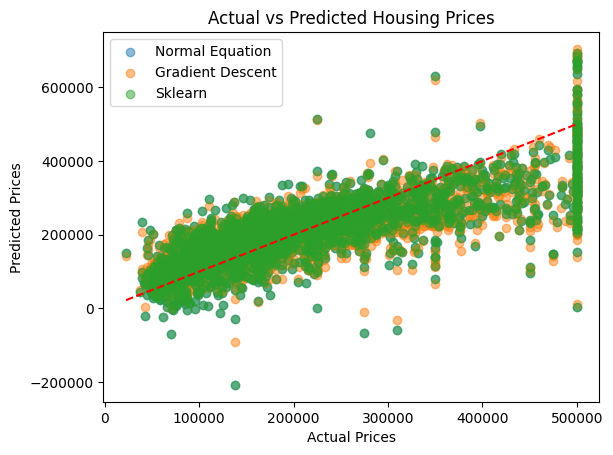

In [ ]:
plt.scatter(y_test, y_pred_ne, alpha=0.5, label="Normal Equation")
plt.scatter(y_test, y_pred_gd, alpha=0.5, label="Gradient Descent")
plt.scatter(y_test, y_pred_sklearn, alpha=0.5, label="Sklearn")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Housing Prices")
plt.legend()
plt.show()

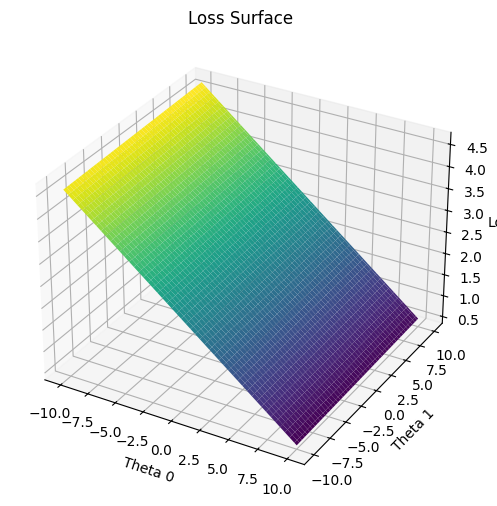

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-10, 10, 100)
loss_surface = np.zeros((len(theta0_vals), len(theta1_vals)))

X_simple = X_train[:, :2]  # bias + one feature
y_simple = y_train

for i, t0 in enumerate(theta0_vals):
    for j, t1 in enumerate(theta1_vals):
        theta_tmp = np.array([t0, t1])
        preds = X_simple @ theta_tmp
        loss_surface[i, j] = np.mean((preds - y_simple) ** 2) / 2

T0, T1 = np.meshgrid(theta0_vals, theta1_vals)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(T0, T1, loss_surface.T, cmap="viridis")
ax.set_xlabel("Theta 0")
ax.set_ylabel("Theta 1")
ax.set_zlabel("Loss")
ax.set_title("Loss Surface")
plt.show()